# Data Visualization using matplotlib 
Problem Statement: Analyzing Air Quality Index (AQI) Trends in a City  
Dataset: "City_Air_Quality.csv" 
Description: The dataset contains information about air quality measurements in a specific 
city over a period of time. It includes attributes such as date, time, pollutant levels (e.g., PM2.5, 
PM10, CO), and the Air Quality Index (AQI) values. The goal is to use the matplotlib library 
to create visualizations that effectively represent the AQI trends and patterns for different 
pollutants in the city.  
Tasks to Perform:  
1.  Import the "City_Air_Quality.csv" dataset. 
2.  Explore the dataset to understand its structure and content. 
3. Identify the relevant variables for visualizing AQI trends, such as date, pollutant levels, 
and AQI values. 
4. Create line plots or time series plots to visualize the overall AQI trend over time. 
5. Plot individual pollutant levels (e.g., PM2.5, PM10, CO) on separate line plots to 
visualize their trends over time. 
6. Use bar plots or stacked bar plots to compare the AQI values across different dates or 
time periods. 
7. Create box plots or violin plots to analyze the distribution of AQI values for different 
pollutant categories. 
8. Use scatter plots or bubble charts to explore the relationship between AQI values and 
pollutant levels. 
9. Customize the visualizations by adding labels, titles, legends, and appropriate color 
schemes. riate color 
schemes. 

- Import necessary libraries

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- Task 1: Import the dataset

In [44]:
df = pd.read_csv("AirQuality.csv", sep=';')

- Task 2: Explore the dataset (print the first few rows and get general info)

In [45]:
print(df.head())
print(df.info())

         Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  Unnamed: 15  Unnamed: 16  
0  0,7578         

- Task 3: Identify relevant variables (assuming columns 'Date', 'PM2.5', 'PM10', 'CO', 'AQI')

In [46]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  # Convert date column to datetime for easier plotting

In [47]:
print(df.columns)

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')


In [48]:
# Convert pollutant levels to numeric, coercing errors to NaN
pollutant_columns = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 
                     'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 
                     'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)']

for col in pollutant_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Calculate AQI based on CO (you can add calculations for other pollutants similarly)
def calculate_aqi(row):
    co_level = row['CO(GT)']
    if pd.isna(co_level):  # Check if co_level is NaN
        return None  # Or handle as needed
    if co_level <= 4.4:
        return 0  # Good
    elif co_level <= 9.4:
        return 50  # Moderate
    elif co_level <= 12.4:
        return 100  # Unhealthy for sensitive groups
    else:
        return 150  # Unhealthy

# Apply the AQI calculation
df['AQI'] = df.apply(calculate_aqi, axis=1)

- Task 4: Create a line plot to visualize the overall AQI trend over time

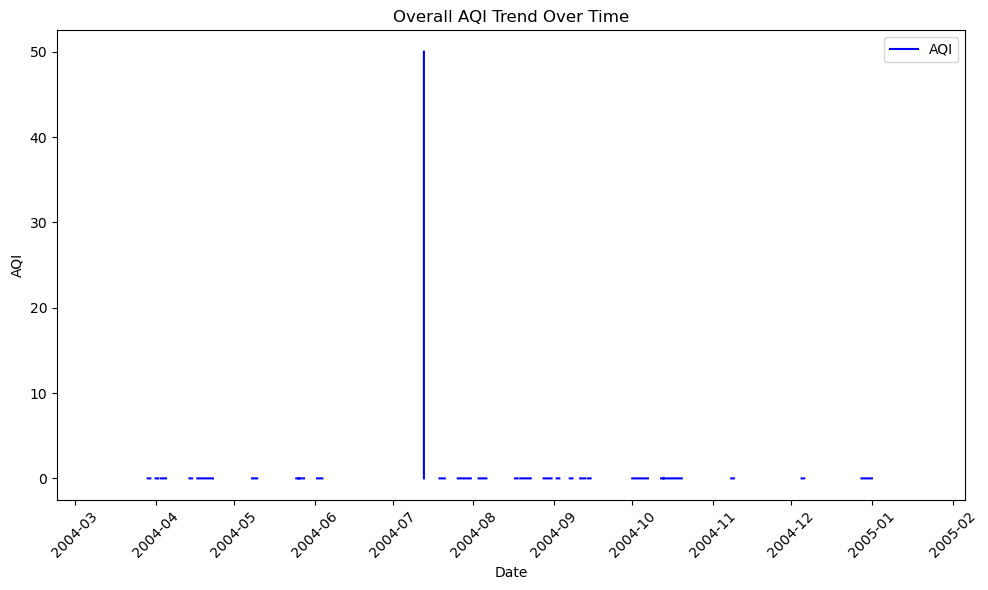

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['AQI'], label='AQI', color='b')
plt.title('Overall AQI Trend Over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16', 'AQI'],
      dtype='object')


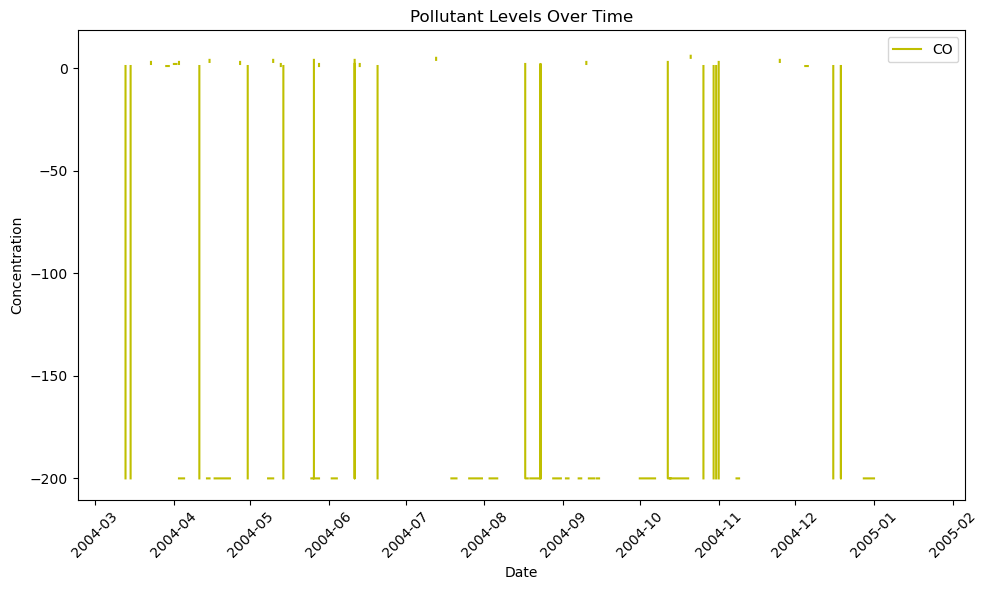

In [50]:
# Check the columns in your DataFrame
print(df.columns)

# Now update the plotting code accordingly
# Replace 'PM2.5', 'PM10', and 'CO' with the correct names from your DataFrame if needed
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['CO(GT)'], label='CO', color='y')  # Replace with actual column names
# Add any other relevant pollutants here, if they exist in your DataFrame
plt.title('Pollutant Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


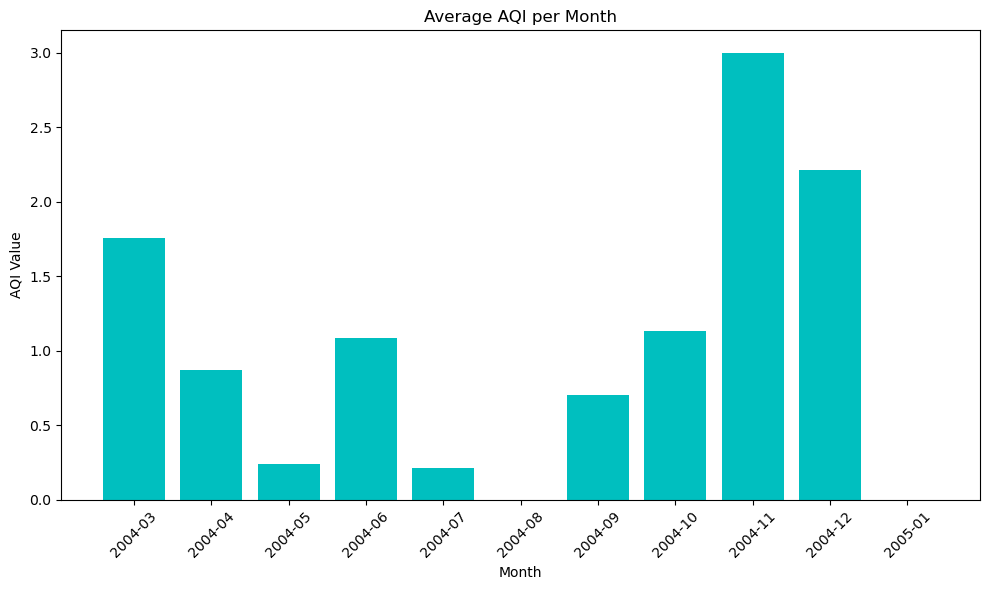

In [51]:
# Task 6: Use a bar plot to compare AQI values across different dates (or time periods)
df['Month'] = df['Date'].dt.to_period('M')  # Group by month for better visualization
avg_aqi_per_month = df.groupby('Month')['AQI'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.bar(avg_aqi_per_month['Month'].astype(str), avg_aqi_per_month['AQI'], color='c')
plt.title('Average AQI per Month')
plt.xlabel('Month')
plt.ylabel('AQI Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16', 'AQI',
       'Month'],
      dtype='object')


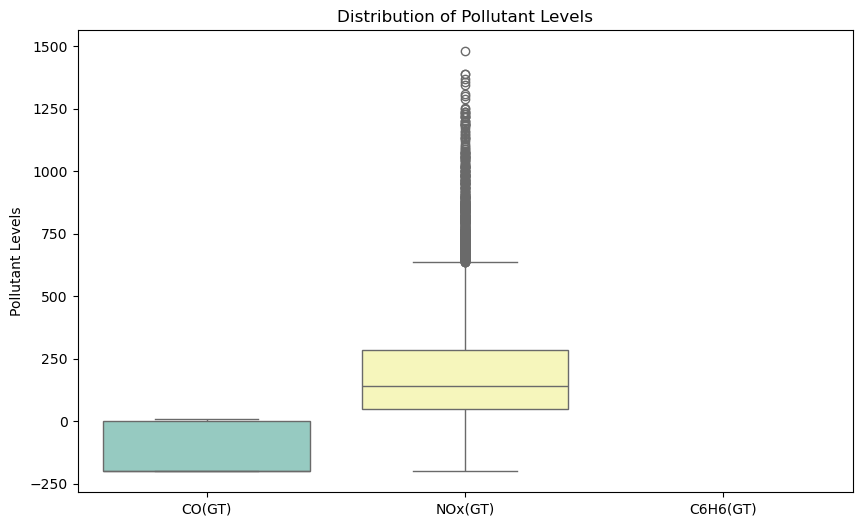

In [41]:
# Check the columns in your DataFrame
print(df.columns)

# Now, create box plots using the available columns
# Update this section with actual names of the pollutants you want to analyze
plt.figure(figsize=(10, 6))
# Replace 'PM2.5', 'PM10', and 'CO' with the actual names from df.columns
sns.boxplot(data=df[['CO(GT)', 'NOx(GT)', 'C6H6(GT)']], palette="Set3")  
plt.title('Distribution of Pollutant Levels')
plt.ylabel('Pollutant Levels')
plt.show()


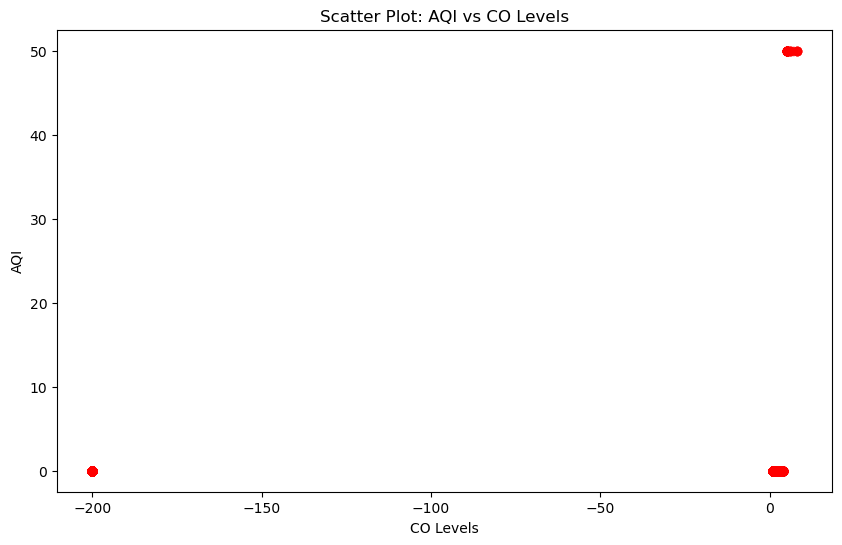

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(df['CO(GT)'], df['AQI'], color='r', alpha=0.6)  
plt.title('Scatter Plot: AQI vs CO Levels')
plt.xlabel('CO Levels')
plt.ylabel('AQI')
plt.show()
